In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
import autograd.numpy as anp
from autograd import grad
from PIL import Image
import math
%matplotlib inline
import os
import cv2 
from skimage import color
from skimage.transform import resize
from skimage.io import imsave
from skimage import feature
import argparse
from __future__ import print_function
from __future__ import division
# import imutils

In [2]:
#WEINER IMAGES MEAN AND LOADING
folder="D:/SEM 4/Project2/Images/weiner_images/signal/"
Weiner_s=[]
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, filename))
    img=resize(color.rgb2gray(img),(512,512))
    Weiner_s.append(img)
folder2="D:/SEM 4/Project2/Images/weiner_images/background/"
Weiner_b=[]
for filename in os.listdir(folder2):
    img = cv2.imread(os.path.join(folder2, filename))
    #print(img.shape)
    img=resize(color.rgb2gray(img),(512,512))
    
    Weiner_b.append(img)

mean_weiner_s = np.array(Weiner_s).mean(axis=0)
mean_weiner_b = np.array(Weiner_b).mean(axis=0)


In [3]:
#AUTOGRAD IMAGES MEAN AND LOADING
folder="D:/SEM 4/Project2/Images/autograd_images/signal/"
auto_s=[]
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, filename))
    img=resize(color.rgb2gray(img),(512,512))
    auto_s.append(img)
folder2="D:/SEM 4/Project2/Images/autograd_images/background/"
auto_b=[]
for filename in os.listdir(folder2):
    img = cv2.imread(os.path.join(folder2, filename))
    #print(img.shape)
    img=resize(color.rgb2gray(img),(512,512))
    auto_b.append(img)
    

mean_auto_s = np.array(auto_s).mean(axis=0)
mean_auto_b = np.array(auto_b).mean(axis=0)


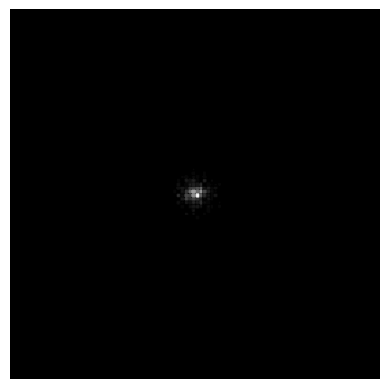

In [14]:
#SAVING IMAGES
plt.imshow(mean_weiner_b,cmap='grey')
plt.axis('off')
plt.savefig("D:/SEM 4/Project2/Probability images/mean_weiner_b.png",bbox_inches='tight',pad_inches = 0)   # save the figure to file
# plt.show()

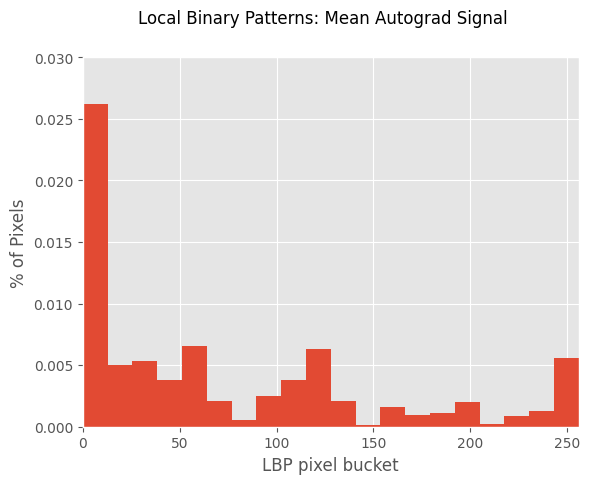

In [45]:
# plt.style.use("ggplot")
(fig, ax) = plt.subplots()
fig.suptitle("Local Binary Patterns: Mean Autograd Signal")
plt.ylabel("% of Pixels")
plt.xlabel("LBP pixel bucket")

features = feature.local_binary_pattern(mean_auto_s, 10, 5, method="default") # method="uniform")
cv2.imshow("LBP", features.astype("uint8"))

ax.hist(features.ravel(), density=True, bins=20, range=(0, 256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.030])
# save figure
fig.savefig("D:/SEM 4/Project2/Probability images/mean_auto_s.png")   # save the figure to file
plt.show()

In [42]:
#AUTOGRAD
img1 = cv2.imread('D:/SEM 4/Project2/Probability images/mean_auto_s.png')
img2 = cv2.imread('D:/SEM 4/Project2/Probability images/mean_auto_b.png')

hist_img1 = cv2.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img1[0, 0, 0] = 0
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_img2 = cv2.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img2[0, 0, 0] = 0
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Find the metric value
metric_val = cv2.compareHist(hist_img2, hist_img1, cv2.HISTCMP_BHATTACHARYYA)
print(metric_val)

0.4425074212365934


In [44]:
#WEINER

img1 = cv2.imread('D:/SEM 4/Project2/Probability images/mean_weiner_s.png')
img2 = cv2.imread('D:/SEM 4/Project2/Probability images/mean_weiner_b.png')

hist_img1 = cv2.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img1[0, 0, 0] = 0
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_img2 = cv2.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img2[0, 0, 0] = 0
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Find the metric value
metric_val = cv2.compareHist(hist_img2, hist_img1, cv2.HISTCMP_BHATTACHARYYA)
print(metric_val)

0.44080849361503766
